<a href="https://colab.research.google.com/github/mogouveia/REPOS_PY_SQL/blob/main/Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

In [5]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'


In [7]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)


<div class="markdown-google-sans">

## <strong>Vamos começar</strong>
</div>

O documento que você está lendo não é uma página da Web estática, mas sim um ambiente interativo chamado <strong>notebook Colab</strong> que permite escrever e executar código.

Por exemplo, aqui está uma <strong>célula de código</strong> com um breve script Python que calcula um valor, armazena-o em uma variável e imprime o resultado:

In [9]:
engine = create_engine('sqlite:///:memory:')

In [11]:
produtos.to_sql('produtos',engine, index=False)

205

In [12]:
pedidos.to_sql('pedidos',engine, index=False)
itens_pedidos.to_sql('itens_pedidos',engine, index=False)
vendedores.to_sql('vendedores',engine, index=False)

5

In [14]:
inspector = inspect(engine)
print(inspector.get_table_names())

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']


In [22]:
query ='SELECT CONDICAO FROM PRODUTOS'

In [28]:
with engine.connect() as conexao:
  consulta = conexao.execute(text(query))
  dados = consulta.fetchall()
pd.DataFrame(dados, columns=consulta.keys())


,Condicao
0,Usado
1,Usado
2,Usado
3,Usado
4,Usado
...,...
200,Usado
201,Usado
202,Usado
203,Usado


In [50]:
def sq_df(query):
  with engine.connect() as conexao:
    consulta = conexao.execute(text(query))
    dados = consulta.fetchall()
  return pd.DataFrame(dados, columns=consulta.keys())

In [51]:
query = 'SELECT UPPER(CONDICAO) AS CONDICAO, COUNT(*) as TOTAL FROM PRODUTOS GROUP BY CONDICAO;'
df_produtos=sq_df(query)
df_produtos

,CONDICAO,TOTAL
0,NOVO COM ETIQUETA,22
1,NOVO SEM ETIQUETA,7
2,USADO,176


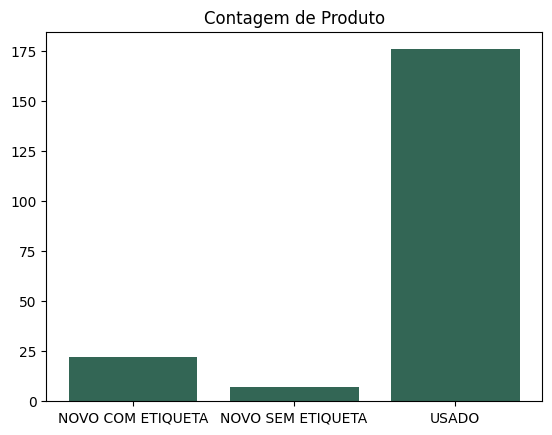

In [39]:
plt.bar(df_produtos['CONDICAO'], df_produtos['TOTAL'], color ='#336655')
plt.title('Contagem de Produto')
plt.show()

In [40]:
produtos.groupby('Condicao').size().reset_index(name='Quantidade')


,Condicao,Quantidade
0,Novo com etiqueta,22
1,Novo sem etiqueta,7
2,Usado,176


In [41]:
sql_df('SELECT * FROM PRODUTOS ').head(3)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado


In [43]:
sql_df('SELECT * FROM ITENS_PEDIDOS').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


from matplotlib import pyplot as plt
_df_0['id_nf'].plot(kind='hist', bins=20, title='id_nf')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['produto_id'].plot(kind='hist', bins=20, title='produto_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['pedido_id'].plot(kind='hist', bins=20, title='pedido_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['quantidade'].plot(kind='hist', bins=20, title='quantidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Estado').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='id_nf', y='produto_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='produto_id', y='pedido_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='pedido_id', y='quantidade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='quantidade', y='valor_unitario', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id_nf']
  ys = series['produto_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('id_nf', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Estado')):
  _plot_series(series, series_name, i)
  fig.legend(title='Estado', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id_nf')
_ = plt.ylabel('produto_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id_nf']
  ys = series['quantidade']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('id_nf', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Estado')):
  _plot_series(series, series_name, i)
  fig.legend(title='Estado', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id_nf')
_ = plt.ylabel('quantidade')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id_nf']
  ys = series['valor_unitario']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('id_nf', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Estado')):
  _plot_series(series, series_name, i)
  fig.legend(title='Estado', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id_nf')
_ = plt.ylabel('valor_unitario')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id_nf']
  ys = series['valor_total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('id_nf', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Estado')):
  _plot_series(series, series_name, i)
  fig.legend(title='Estado', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id_nf')
_ = plt.ylabel('valor_total')

from matplotlib import pyplot as plt
_df_13['id_nf'].plot(kind='line', figsize=(8, 4), title='id_nf')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['produto_id'].plot(kind='line', figsize=(8, 4), title='produto_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['pedido_id'].plot(kind='line', figsize=(8, 4), title='pedido_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['quantidade'].plot(kind='line', figsize=(8, 4), title='quantidade')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Estado'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='id_nf', y='Estado', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Estado'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='produto_id', y='Estado', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Estado'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='pedido_id', y='Estado', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Estado'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='quantidade', y='Estado', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [55]:
query='''SELECT P.PRODUTO, I.PRODUTO_ID, SUM(I.QUANTIDADE) AS TOTAL
FROM PRODUTOS AS P INNER JOIN ITENS_PEDIDOS AS I
ON P.PRODUTO_ID=I.PRODUTO_ID
GROUP BY P.PRODUTO, I.PRODUTO_ID
ORDER BY 3 DESC'''
sq_df(query)


,produto,produto_id,TOTAL
0,Saia Midi Cinto,32126,549
1,Vestido Nude Reta,13814,547
2,Blusa Manga Estampa,47405,536
3,Camisa Xadrez Azul,33976,511
4,Cropped Escritas Pb,53941,508
...,...,...,...
200,Vestido Recortes Cores,18790,333
201,Blusa Malha Azul,88368,325
202,Blusa Listrada Malha,84743,322
203,Vestido Malha Estampa,47682,318


In [57]:
df_prod_quant=sq_df(query)
df_prod_quant



,produto,produto_id,TOTAL
0,Saia Midi Cinto,32126,549
1,Vestido Nude Reta,13814,547
2,Blusa Manga Estampa,47405,536
3,Camisa Xadrez Azul,33976,511
4,Cropped Escritas Pb,53941,508
...,...,...,...
200,Vestido Recortes Cores,18790,333
201,Blusa Malha Azul,88368,325
202,Blusa Listrada Malha,84743,322
203,Vestido Malha Estampa,47682,318


<function matplotlib.pyplot.show(close=None, block=None)>

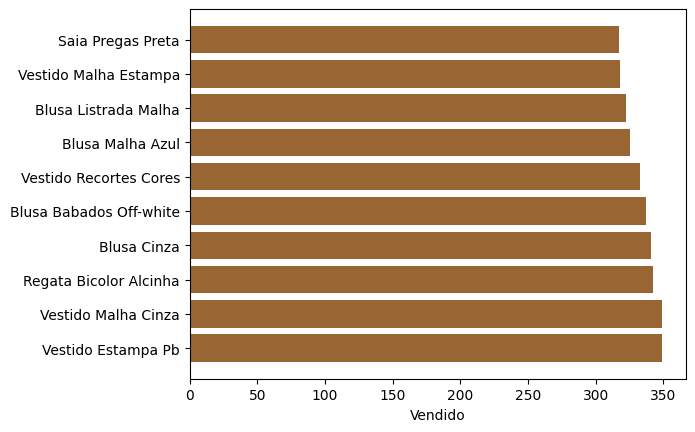

In [59]:
plt.barh(df_prod_quant['produto'][-10:], df_prod_quant['TOTAL'][-10:], color='#996633')
plt.xlabel('Vendido')
plt.show


In [60]:
df_prod_quant = itens_pedidos.merge(produtos, on='produto_id')
df_prod_quant = df_prod_quant.groupby('produto')['quantidade'].sum().reset_index()
df_prod_quant = df_prod_quant.sort_values('quantidade', ascending=True).reset_index(drop=True)
df_prod_quant


,produto,quantidade
0,Vestido Malha Estampa,318
1,Blusa Listrada Malha,322
2,Blusa Malha Azul,325
3,Blusa Babados Off-white,337
4,Blusa Cinza,341
...,...,...
196,Saia Midi Cinto,549
197,Calca Alfaiataria Preta,750
198,Saia Pregas Preta,751
199,Calca Jeans Costuras,755


In [61]:
df_itens_pedidos = sql_df('SELECT VALOR_TOTAL FROM ITENS_PEDIDOS')
receita = df_itens_pedidos['valor_total'].sum()
receita


45803930

In [62]:
query = '''SELECT SUM(VALOR_TOTAL) AS RECEITA
FROM ITENS_PEDIDOS;
'''
df_itens_pedidos = sql_df(query)
df_itens_pedidos


,RECEITA
0,45803930


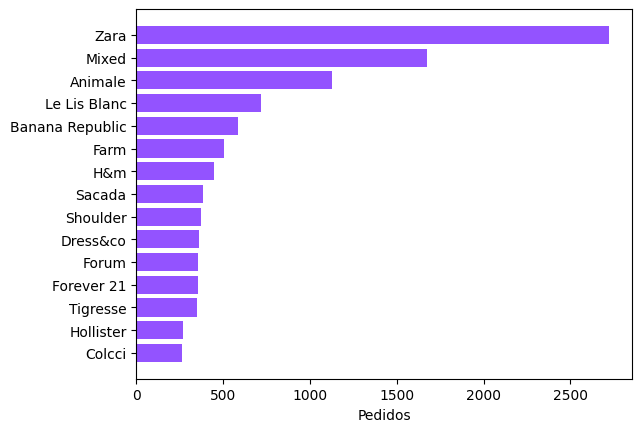

In [63]:
query = '''SELECT PRODUTOS.MARCA, COUNT (*) AS 'Pedidos'
FROM PRODUTOS, ITENS_PEDIDOS
WHERE PRODUTOS.PRODUTO_ID = ITENS_PEDIDOS.PRODUTO_ID
GROUP BY PRODUTOS.MARCA
ORDER BY COUNT(*) ASC;
'''
df_marcas = sql_df(query)
plt.barh(df_marcas['marca'][-15:], df_marcas['Pedidos'][-15:], color = '#9353FF')
plt.xlabel('Pedidos')
plt.show()


In [67]:
query ='''SELECT VENDEDOR_ID, COUNT(*)
FROM PEDIDOS
WHERE strftime('%Y', data_compra) = '2020'
GROUP BY VENDEDOR_ID'''
sq_df(query)

,vendedor_id,COUNT(*)
0,1,3427
1,2,3338
2,3,2782
3,4,2510
4,5,2488


In [68]:
## Selecionar dados do ano de 2019
query = '''
SELECT strftime('%m', data_compra) AS mes, COUNT(*) AS quantidade_vendas
FROM pedidos
WHERE strftime('%Y', data_compra) = '2019'
GROUP BY mes;
'''
vendas_19 = sql_df(query)
vendas_19

## Selecionar dados do ano de 2020
query = '''
SELECT strftime('%m', data_compra) AS mes, COUNT(*) AS quantidade_vendas
FROM pedidos
WHERE strftime('%Y', data_compra) = '2020'
GROUP BY mes;
'''
vendas_20 = sql_df(query)
vendas_20


,mes,quantidade_vendas
0,01,1271
1,02,1197
2,03,1280
3,04,1276
4,05,1206
5,06,896
6,07,984
7,08,1163
8,09,1221
9,10,1139


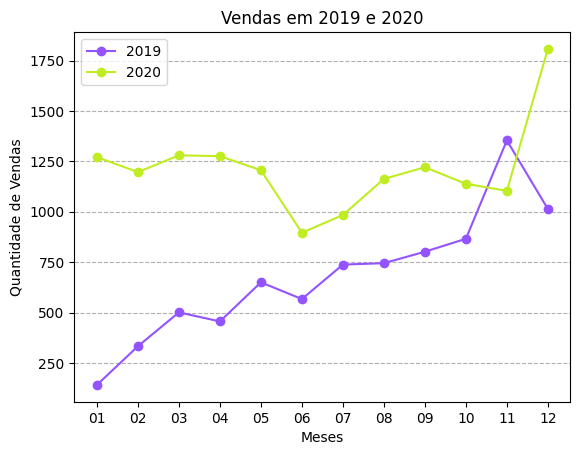

In [69]:
import matplotlib.pyplot as plt

# Plotar o gráfico de 2019 e 2020
plt.plot(vendas_19.mes.to_numpy(), vendas_19.quantidade_vendas.to_numpy(), marker='o', linestyle='-', color='#9353FF', label = '2019')
plt.plot(vendas_20.mes.to_numpy(), vendas_20.quantidade_vendas.to_numpy(), marker='o', linestyle='-', color='#C0ED22', label = '2020')

# Definir título e eixos
plt.title('Vendas em 2019 e 2020')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Vendas')

# Adicionar a legenda
plt.legend()

# Adicionar grid horizontal
plt.grid(axis='y', linestyle='--')

# Exibir a figura
plt.show()


<div class="markdown-google-sans">

## Ciência de dados
</div>

Com o Colab, você pode aproveitar todo o potencial das conhecidas bibliotecas Python para analisar e ver dados. A célula de códigos abaixo usa <strong>numpy</strong> para gerar dados aleatórios e <strong>matplotlib</strong> para visualizá-los. Para editar o código, basta clicar na célula e começar a editar.

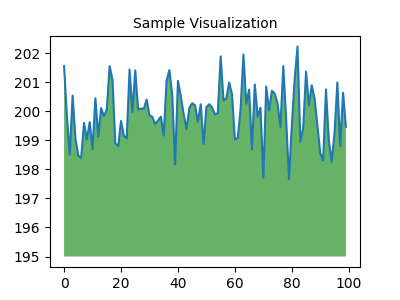

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

É possível importar para os notebooks do Colab os dados da sua conta do Google Drive, como planilhas. Também é possível importar do GitHub e de muitas outras fontes. Para saber mais sobre como importar dados e como o Colab pode ser usado para a ciência de dados, consulte o link abaixo em <a href="#working-with-data">Como trabalhar com dados</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

Com o Colab, é possível importar um conjunto de dados de imagem, treinar um classificador de imagens dentro dele e avaliar o modelo, tudo com apenas <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">algumas linhas de código</a>. Os notebooks do Colab executam código dos servidores em nuvem do Google. Isso significa que você pode tirar proveito da potência de hardware do Google, como <a href="#using-accelerated-hardware">GPUs e TPUs</a>, independentemente da potência da sua máquina. Você só precisa de um navegador.

O Colab é usado amplamente pela comunidade de machine learning, para aplicações como:
- Começar a usar o TensorFlow
- Desenvolvimento e treinamento de redes neurais
- Experimentos com TPUs
- Divulgação de pesquisas em IA
- Criação de tutoriais

Para acessar notebooks do Colab que demonstram aplicações de machine learning, consulte os <a href="#machine-learning-examples">exemplos de machine learning</a> abaixo.

<div class="markdown-google-sans">

## Mais recursos

### Como trabalhar com Notebooks no Colab

</div>

- [Visão geral do Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guia sobre Markdown](/notebooks/markdown_guide.ipynb)
- [Importar bibliotecas e instalar dependências](/notebooks/snippets/importing_libraries.ipynb)
- [Salvar e carregar notebooks no GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulários interativos](/notebooks/forms.ipynb)
- [Widgets interativos](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Como trabalhar com dados
</div>

- [Carregar dados: Drive, Planilhas e Google Cloud Storage](/notebooks/io.ipynb)
- [Gráficos: visualizar dados](/notebooks/charts.ipynb)
- [Começar a usar o BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Curso intensivo de machine learning

<div>

Estes são alguns notebooks do curso on-line do Google sobre machine learning. Acesse o <a href="https://developers.google.com/machine-learning/crash-course/">site do curso completo</a> para saber mais.
- [Introdução ao Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regressão linear com tf.keras e uso de dados sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Usar hardware acelerado
</div>

- [TensorFlow com GPUs](/notebooks/gpu.ipynb)
- [TensorFlow com TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Exemplos em destaque

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: use o kit de ferramentas para IA conversacional do Nvidia NeMo para trocar uma voz em um fragmento de áudio por uma gerada por computador.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Treinar novamente um classificador de imagens</a>: crie um modelo do Keras com base em um classificador de imagens pré-treinado para distinguir flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Classificação de texto</a>: classifique avaliações de filmes do IMDB como <em>positivas</em> ou <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferência de estilo</a>: use o aprendizado profundo para transferir o estilo entre imagens.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Perguntas e respostas sobre o codificador de frases universais multilíngue</a>: use um modelo de machine learning para responder a perguntas do conjunto de dados SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolação de vídeo</a>: preveja o que aconteceu em um vídeo entre o primeiro e o último frames.
